In [1]:
%load_ext autoreload
%autoreload 2

# GenReco - The Lyrics-based Genre Recognizer

The primary objective of this project is to investigate the feasibility of predicting a song's genre based on its lyrical features. With the vast amount of music available today, categorizing songs into genres manually can be time-consuming and subjective.

By leveraging the power of data science techniques, we aim to explore whether the lyrical characteristics of songs can serve as reliable indicators for genre classification. Through this research, we intend to contribute to the field of music analysis and enhance our understanding of the relationship between lyrics and musical genres.

# Procedure

The project will follow a systematic procedure to investigate the predictability of song genres based on lyrical features.

## Study
Initially, extensive research will be conducted to gain a comprehensive understanding of the subject matter, exploring existing studies and theories related to music genre classification.

## Dataset Generation
To generate a suitable dataset for analysis, we will utilize the Spotify API to retrieve relevant song metadata such as artist, album, and genre information. Additionally, we will crawl lyrics from Genius.com, a popular lyrics website, to obtain the lyrical features necessary for our analysis. By combining these sources, we aim to create a diverse and representative dataset that encompasses a wide range of genres and artists.

## Pre-EDA
Once the dataset is obtained, we will focus on understanding its composition and characteristics.
 The characteristics we will be focusing on are the data types and their distributions.
 Exploratory data analysis (EDA) techniques, including visualizations and statistical summaries, will be employed to gain insights into the distribution and relationships between lyrical features and song genres. This exploratory phase will allow us to draw preliminary conclusions and identify any initial patterns or trends within the data, as well as measures of Central Tendency and Variability.

## Data Curation
Next, data curation steps will be applied to ensure the quality and reliability of the dataset. This process will involve the identification and removal of duplicate entries, as well as the detection and handling of outliers or inconsistencies in the data. By carefully curating the dataset, we aim to enhance the accuracy and integrity of our subsequent analysis.

## EDA
Following data curation, an in-depth exploratory data analysis will be conducted. This phase will involve examining the distributions, correlations, and other relevant statistical properties of the lyrical features across different genres. Visualizations such as histograms, scatter plots, and box plots will be employed to facilitate a comprehensive understanding of the dataset and unveil potential insights regarding the relationship between lyrical features and song genres.

## Machine Learning
With a solid grasp of the dataset and its characteristics, we will proceed to the model selection stage. Various machine learning algorithms, such as decision trees, random forests, or KNN, will be evaluated and compared to identify the most suitable model for genre prediction based on lyrical features. Model performance metrics, including accuracy, precision, and recall, will be assessed to determine the effectiveness of each algorithm in capturing the underlying patterns within the data.

## Conclusions
Finally, based on the chosen model and its performance, we will draw final conclusions regarding the project's main objective: the predictability of song genres using lyrical features. The findings of this research endeavor will shed light on the relationship between lyrics and musical genres, providing valuable insights for music analysis and potentially influencing future advancements in genre classification methodologies.

# Some Imports...
Here we are importing the 3rd-party libraries required for the notebook and demonstrations purposes,
as well as some proprietary functionality that we've exported to modules, in order to avoid clutter in the notebook.

In [2]:
# IMPORT 3RD PARTY LIBRARIES

import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [3]:
# IMPORT UTILS

from utils.ml_utils import split_to_train_and_test, get_classifier_obj, calc_evaluation_val, find_best_k_for_KNN, \
    find_best_model
from utils.curation_utils import transfer_to_categorical, remove_duplicates_and_drop_na, repair_numeric_missing_vals, \
    outlier_detection_iqr, my_dist_to_avg
from utils.plot_utils import plot_frequent_elements, plot_cross_tabulation, get_highly_correlated_cols, \
    transfer_str_to_numeric_vals, plot_frequencies, plot_continuous_feature_relations, plot_histograms
from utils.general_utls import load_dataset
from utils.lyrics_utils import reget_lyrics_df, remove_non_english_songs

# Dataset Generation

The generation of the dataset was carried out separately using a regular Python script execution. This approach was chosen to maintain a clear distinction between the dataset and its analysis within this notebook. By treating the dataset as pre-existing data, it allows for better organization of our thought process and prevents mixing the data generation process with its subsequent analysis.

>Having said that, during the process of the data analysis, we will not shy away from manipulating the data to fit our needs.

<i>Refer to generate_dataset.py</i>

# Loading the Dataset

In [4]:
file_name = "huge_dataset.csv"
dataset_file_path = osp.join(osp.dirname(osp.abspath("__file__")), file_name)
dataset = load_dataset(dataset_file_path)

# Pre-EDA: Data Visualization

Let us examine the individual columns in the data.
The data contains the following fields:

| Column Name      | Data Type   | Variable type |
|------------------|-------------|----|
| source_genre     | object      | Free text |
| name             | object      | Free text |
| artists          | object      | Free text |
| release_year     | int64       | Ordinal |
| release_month    | float64     | Ordinal |
| genres           | object      | List |
| genre     | object      | Categorial |
| duration         | int64       | Numeric|
| popularity       | int64       | Ordinal|
| lyrics_file      | object      | Free text (metadata) |
| lyrics_url       | object      | Free text (metadata) |
| intro_cnt        | float64     | Ordinal|
| outro_cnt        | float64     | Ordinal|
| verse_cnt        | float64     | Ordinal|
| chorus_cnt       | float64     | Ordinal|
| line_cnt         | float64     | Numeric|
| word_cnt         | float64     | Numeric|
| unique_words_cnt | float64     | Ordinal |
| stop_words_cnt   | float64     | Ordinal |
| slang_words_cnt  | float64     | Ordinal |
| positive         | float64     | Ordinal |
| negative         | float64     | Ordinal |
| neutral          | float64     | Ordinal |
| compound         | float64     | Ordinal |

## Top Elements
With Pie Charts, we can see the ratio of the leading elements of each feature

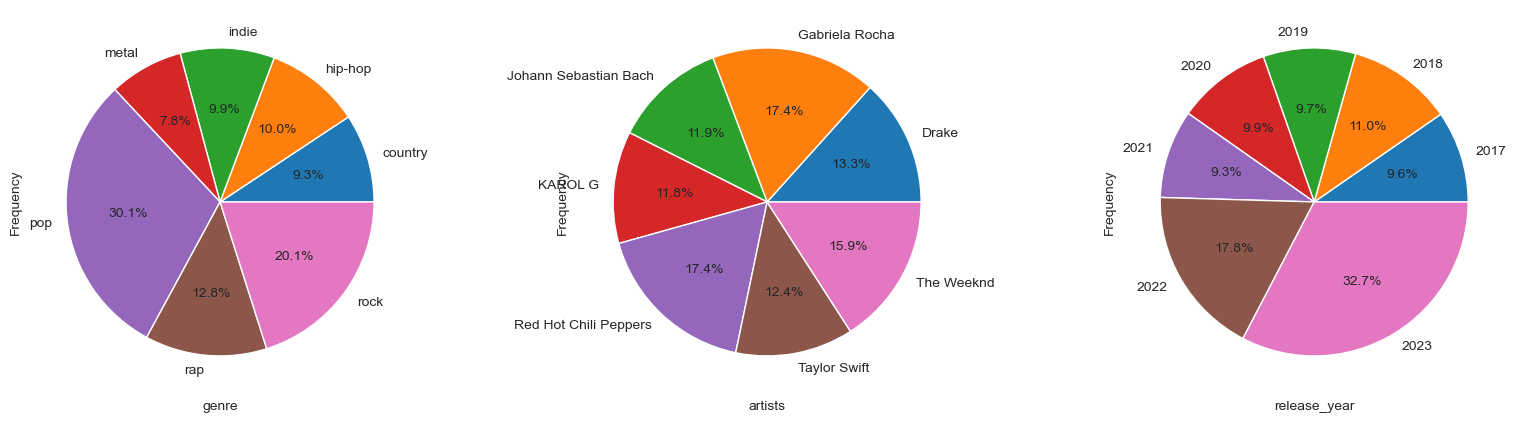

In [5]:
pie_cols = ['genre', 'artists', 'release_year']
plot_frequencies(dataset, pie_cols, 'pie', 7)

As the graphs show, we can learn that, out of the leading values:
- there are significantly more pop songs than other genres
- the artists are mostly balanced
- big majority of the data is recently released songs

## Ordinal Variables Frequency
With Bar Charts, it's easier to understand how frequent every ordinal variable is, in relation to itself.
We are using bar charts as the data has relatively small diversity in data (less values, more repetitions)

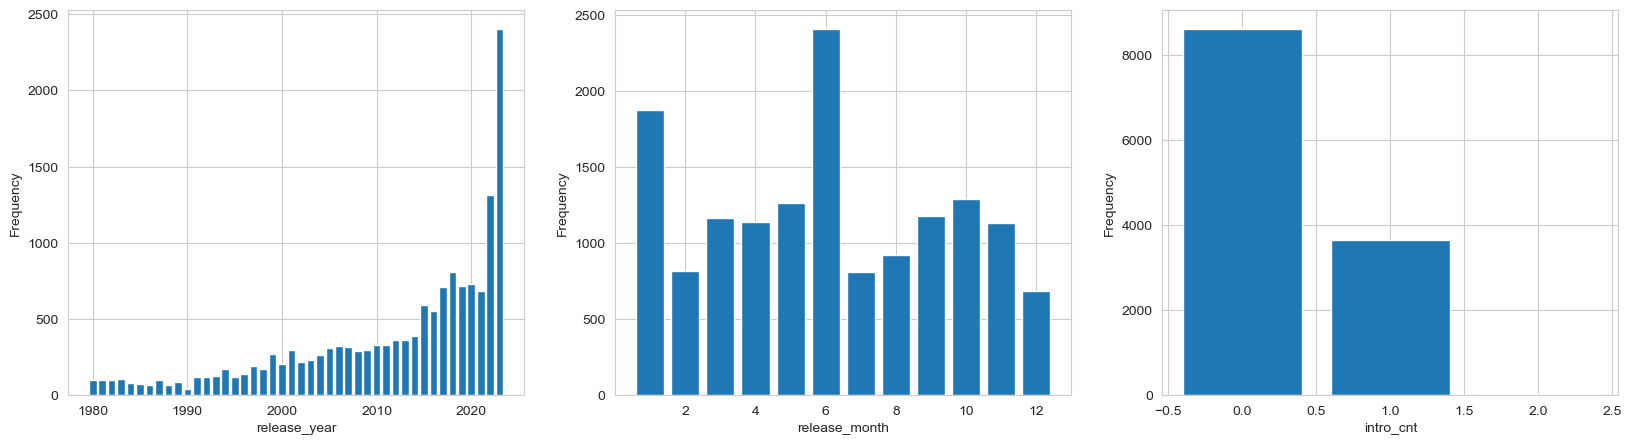

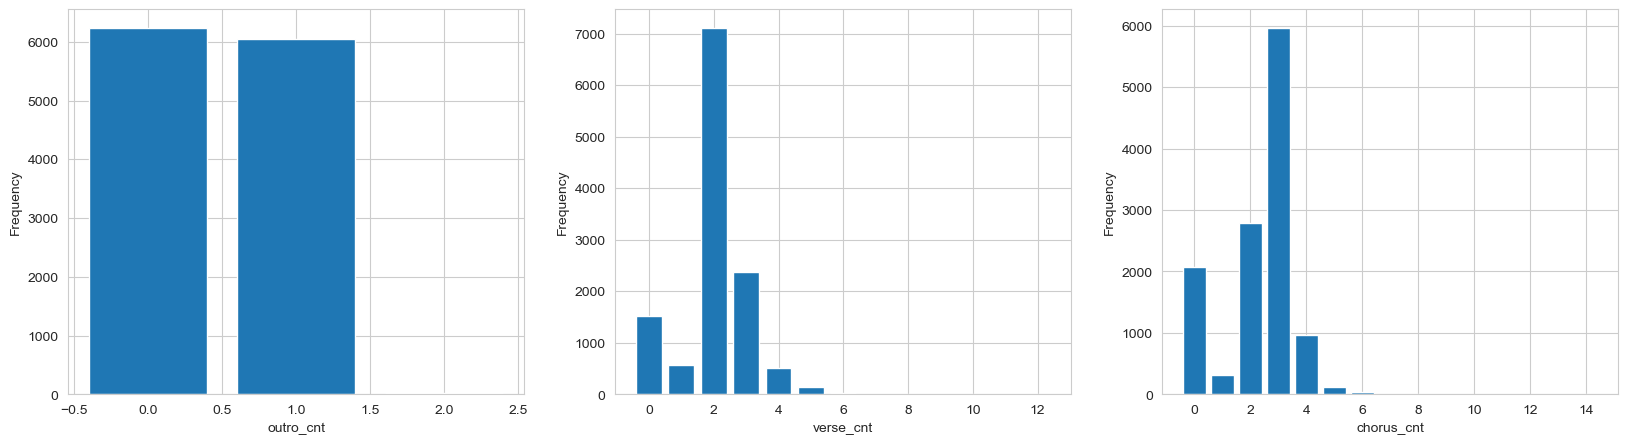

In [6]:
bars_cols = ['release_year', 'release_month',
             'intro_cnt', 'outro_cnt', 'verse_cnt', 'chorus_cnt']
plot_frequencies(dataset, bars_cols, 'bar')

As the graphs show, we can learn that:
- as seen before, most of the data is indeed new songs. In addition, the data decreases as the years go back
- <b>suspiciously</b>, there are 0 chorus and verse count, which might indicate an issue with the data
- songs are release relatively on the same rate across the year's month, with a slight increase at the beginning and middle of the year (summer and winter peaks)

## Continuous Variable Distributions
For variables which values are continuous we'll use histogram charts to show their distributions

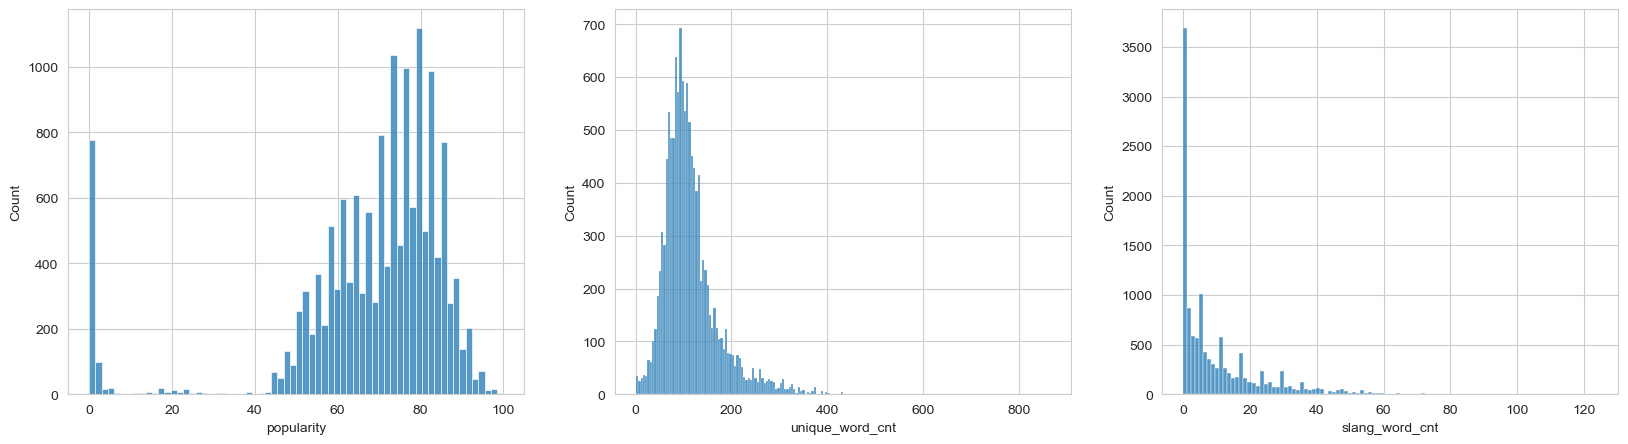

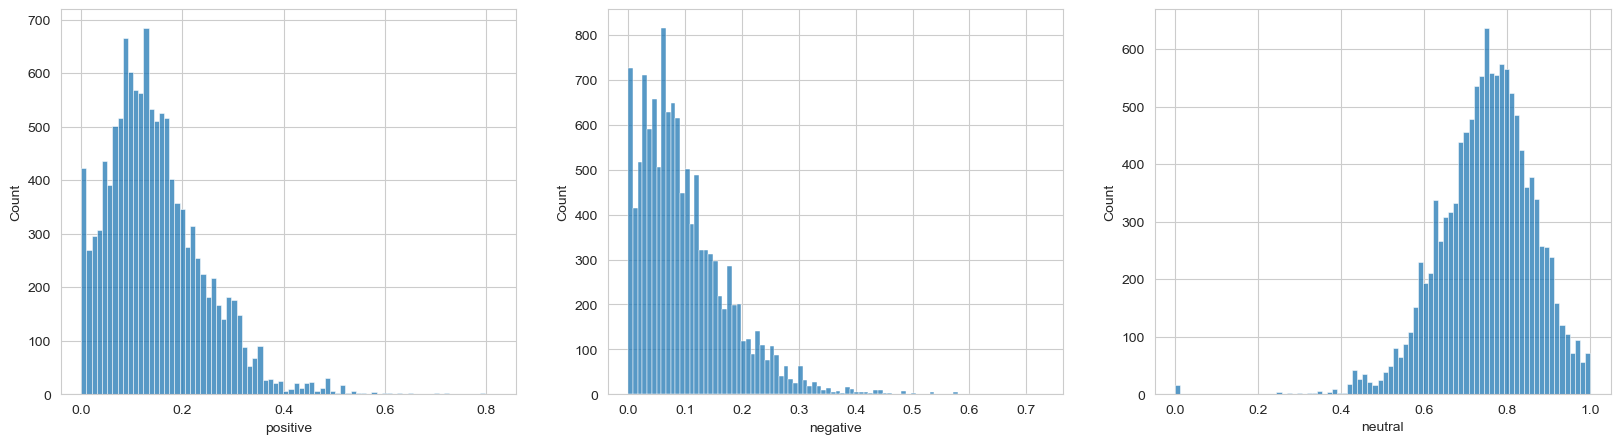

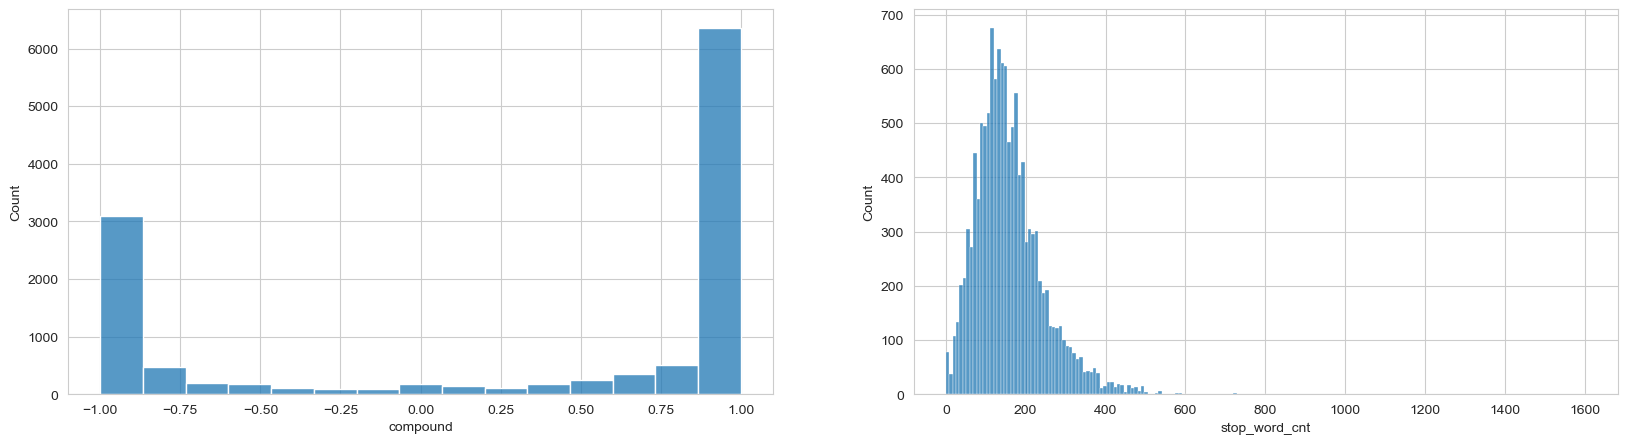

In [7]:
histogram_cols = ['popularity', 'unique_word_cnt', 'slang_word_cnt',
                  'positive', 'negative', 'neutral', 'compound', 'stop_word_cnt']
plot_histograms(dataset, histogram_cols)

As the graphs show, we can learn that:
- popularity has lots of 0's, which are missing values - so this column should probably be disregarded

# Follow-up suspicions
1. Zero chorus/verse count
    - we found out many songs had no lyrics files attached in the dataset, and most of them were from classical genre.
        This makes sense as the classical music is instrumental. Hence, we will discard the classic genre
    - another cause for the missing data about chorus/verse was songs in foreign language, where the chorus was labeled in the native language, rather English). We will discard foreign songs from the dataset
    - finally, the remaining missing data was due to wrong format of the lyrics file, which had no labels as we expected. This data is kept and these records will be handled by filling the missing values with the mean, to keep balance.
2. Zero popularity
    - As opposed to our initial assumption, that records where popularity was 0 are very old songs, we were surprised to find out that ALL the 0-popularity songs are from June 2023 (as shown in the graph below)
        We assume this is caused by either lack of data on the Spotify database or that they try to give chance for new release to gain popularity.
        We decided to keep the popularity as the missing values are at low freq (less than 8%), and we will fill them with the mean.

<Axes: xlabel='release_year', ylabel='popularity'>

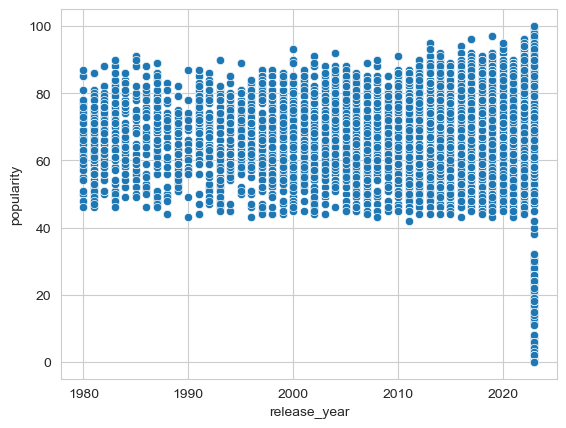

In [8]:
sns.scatterplot(dataset, y="popularity", x="release_year")

# Feature Relations Visualizations
Let's examine the relationships between our features, in pairs. For that we'll use Scatterplot of each pair.

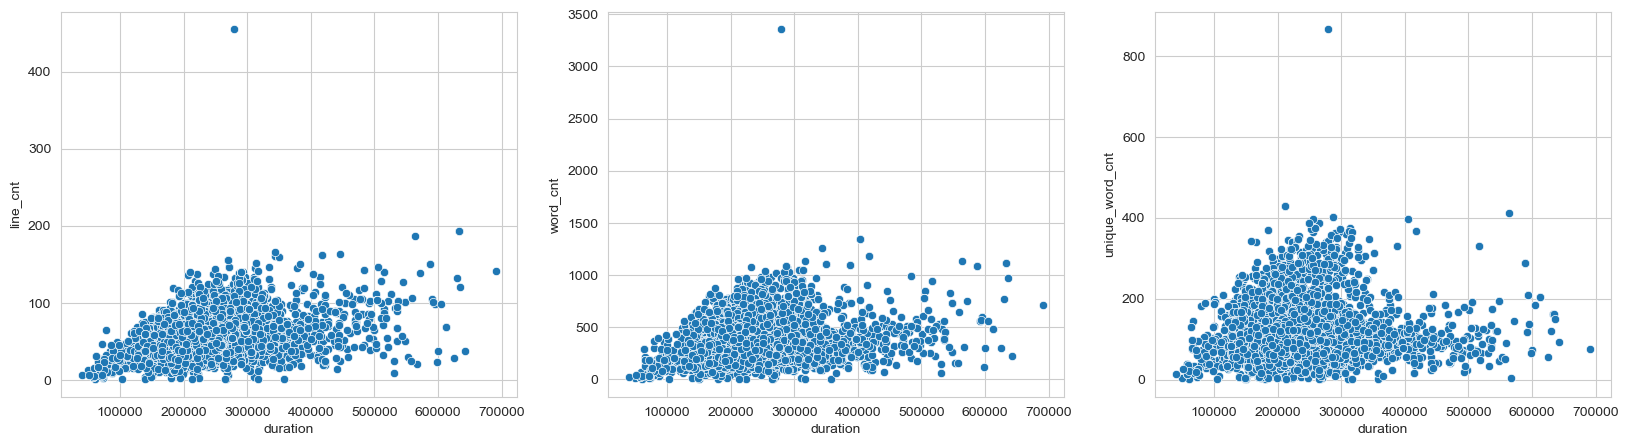

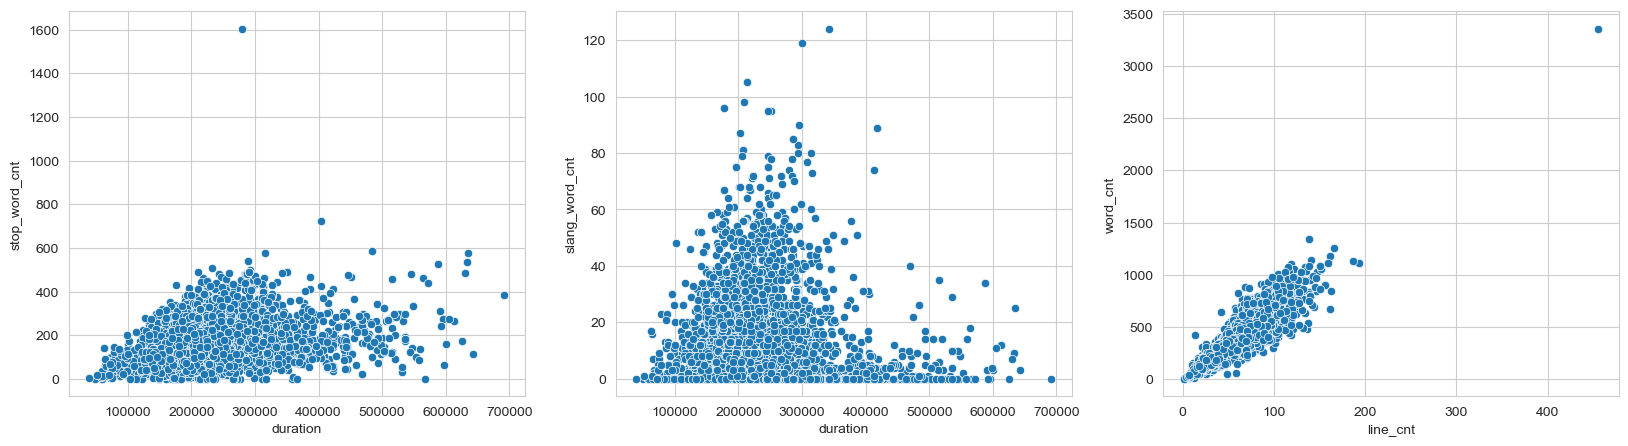

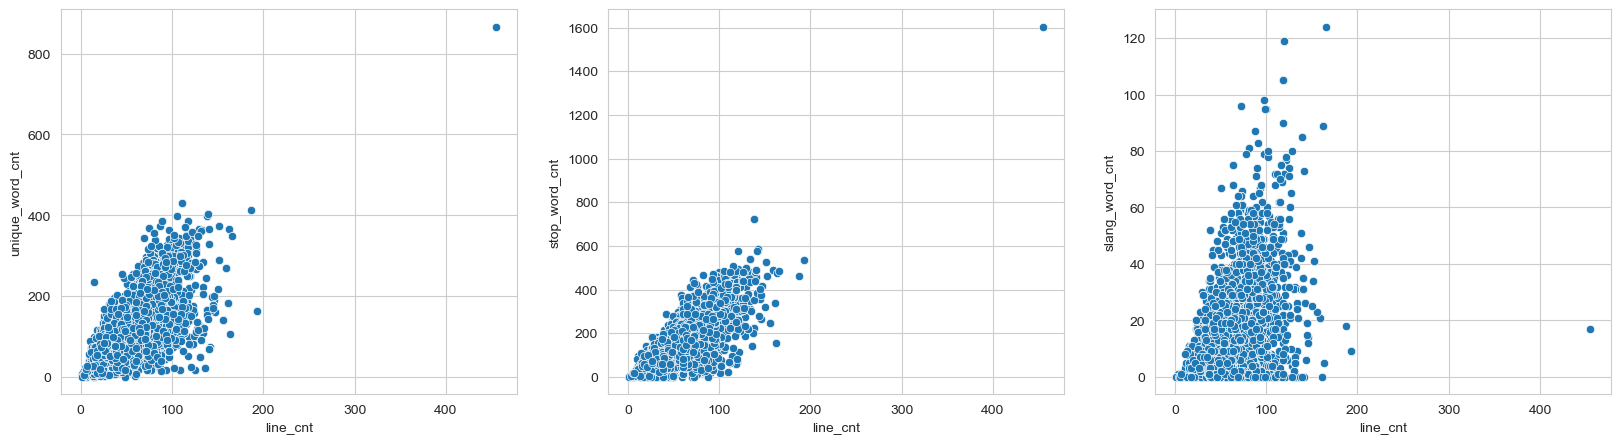

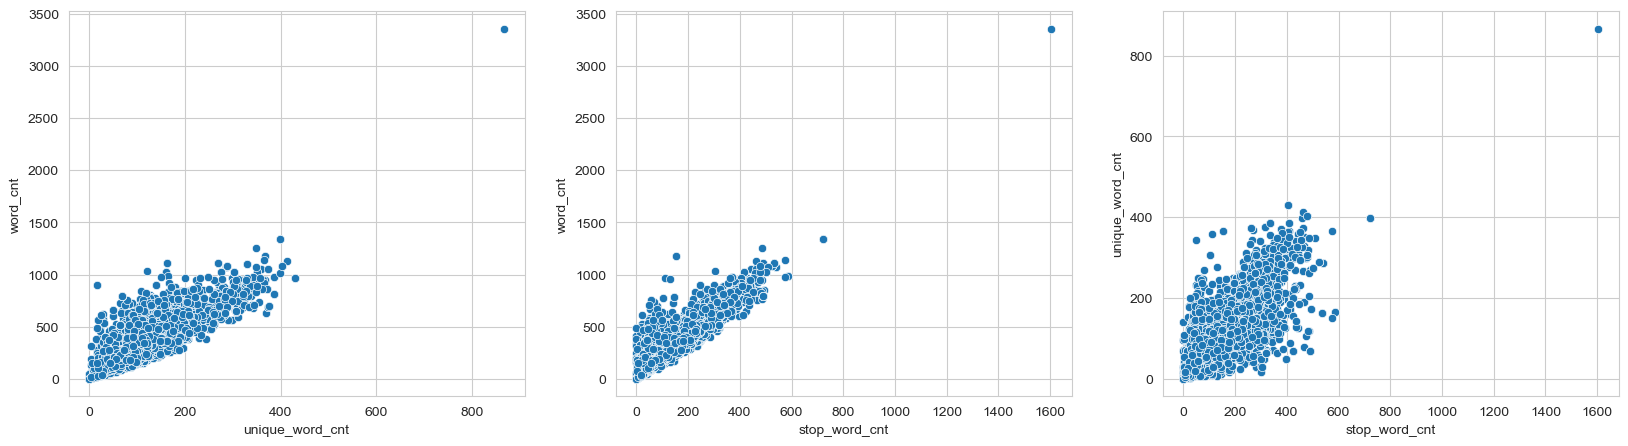

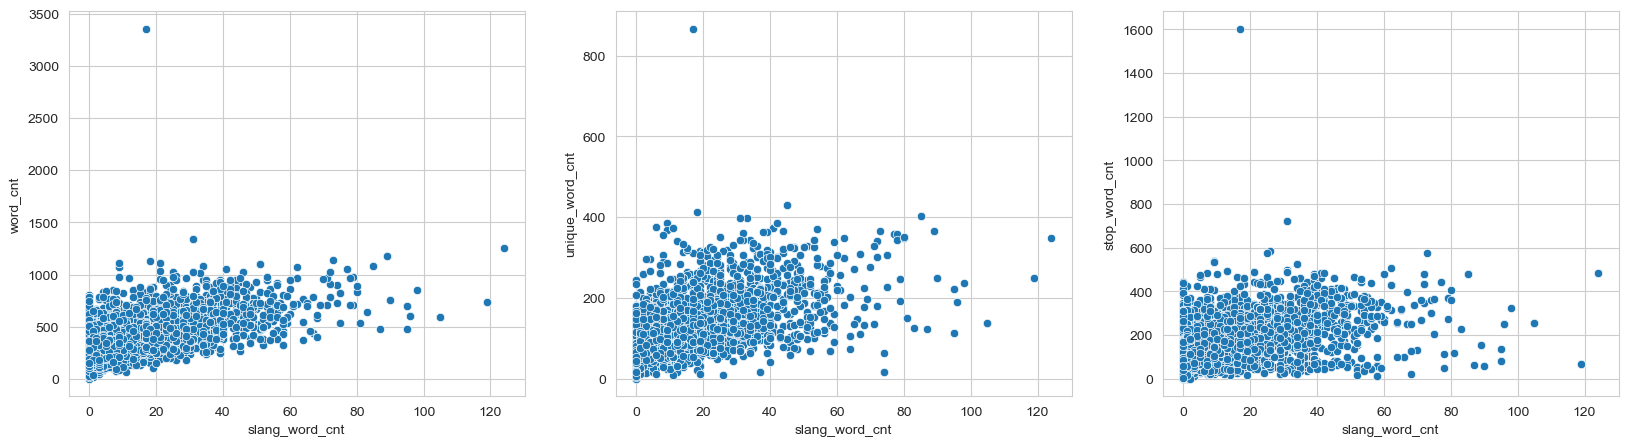

In [9]:
continuous_vars = ["duration", "line_cnt", "word_cnt", "unique_word_cnt", "stop_word_cnt", "slang_word_cnt"]
plot_continuous_feature_relations(dataset, continuous_vars)

## Relationships Insights
Except for the obvious increase in count feature to the word or line count features, there doesn't seem to be any distinct relationship we can conclude from the data

# Data Curation

## Missing Values & Outliers Hunt
As identified above, we have some records we want to discard due to invalidity.
Here we will remove the classic genre, and non-English songs. Then, we will fill the remaining missing values with the mean of each column respectively.

Seeing the graphs have less dense areas, we identify there are some few values that are outliers relative to the majority of the data. We would like to discard them to get a consolidated data

<BarContainer object of 15 artists>

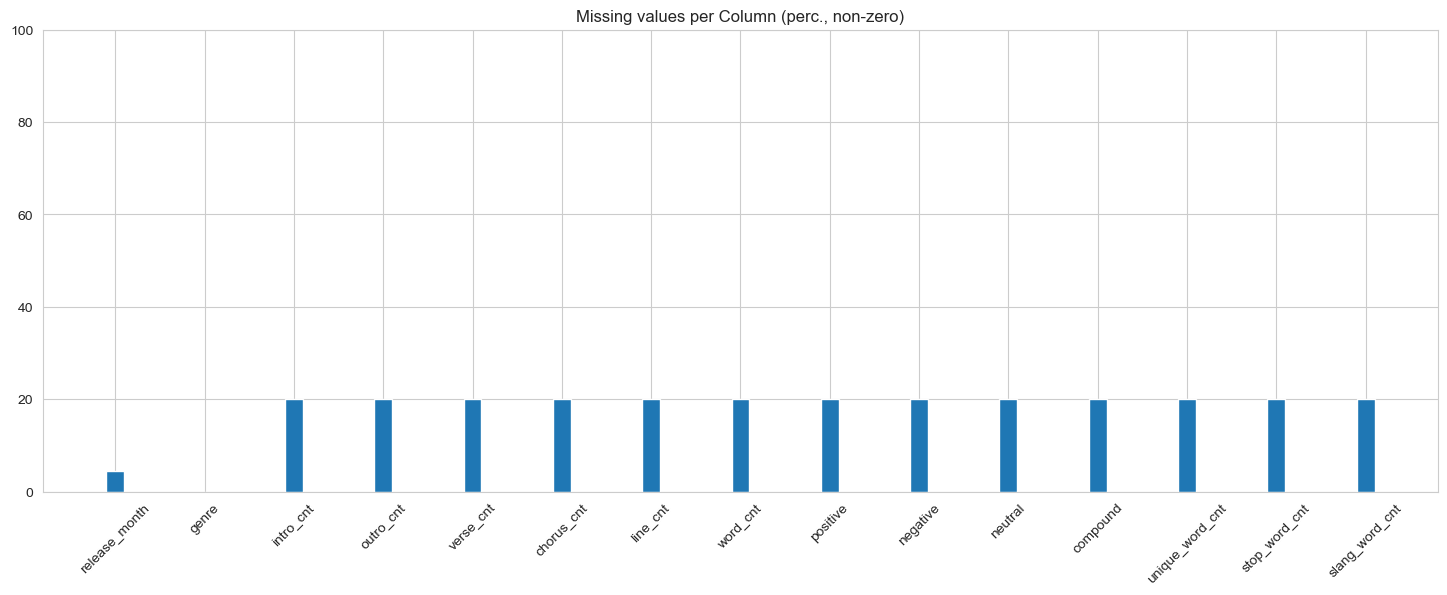

In [10]:
missing_values = (dataset.isna() | dataset.isnull()).sum() / len(dataset)
missing_values = missing_values[missing_values>0]
plt.figure(figsize=(18, 6))
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.title("Missing values per Column (perc., non-zero)")
plt.bar(missing_values.index, missing_values.values*100, width=0.2)

## Analysis: missing values
Some records don't have the release_month field set. This is because the original released date in the dataset included the release year only. Since this is a not-so-significant amount of data, we will get rid of these lines

In [11]:
dup_na_removed = remove_duplicates_and_drop_na(dataset)
non_english_removed = remove_non_english_songs(dup_na_removed)
outliers = outlier_detection_iqr(non_english_removed, my_dist_to_avg)
repaired = repair_numeric_missing_vals(outliers, dup_na_removed.select_dtypes('number'))
# Fix cnt values to be int
for col in repaired.columns:
    if "_cnt" in col or col in ['duration', 'popularity', 'release_year', 'release_month']:
        repaired[col] = repaired[col].astype(int)

repaired.drop(repaired[repaired.genre == 'classical'].index, inplace=True)
repaired.genre = repaired.genre.astype('category')
repaired.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5035 entries, 0 to 15397
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   source_genre     5035 non-null   object  
 1   name             5035 non-null   object  
 2   artists          5035 non-null   object  
 3   release_year     5035 non-null   int64   
 4   release_month    5035 non-null   int64   
 5   genres           5035 non-null   object  
 6   genre            5035 non-null   category
 7   duration         5035 non-null   int64   
 8   popularity       5035 non-null   int64   
 9   lyrics_file      5035 non-null   object  
 10  lyrics_url       5035 non-null   object  
 11  intro_cnt        5035 non-null   int64   
 12  outro_cnt        5035 non-null   int64   
 13  verse_cnt        5035 non-null   int64   
 14  chorus_cnt       5035 non-null   int64   
 15  line_cnt         5035 non-null   int64   
 16  word_cnt         5035 non-null   int64   

/Users/bar-study/PycharmProjects/genreReco/utils/curation_utils.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.loc[abs(z_score) > 3] = np.nan


## Visualize - Round #2
Let's inspect the data after curation. We expect all the graphs to be dense and the data will remain balanced

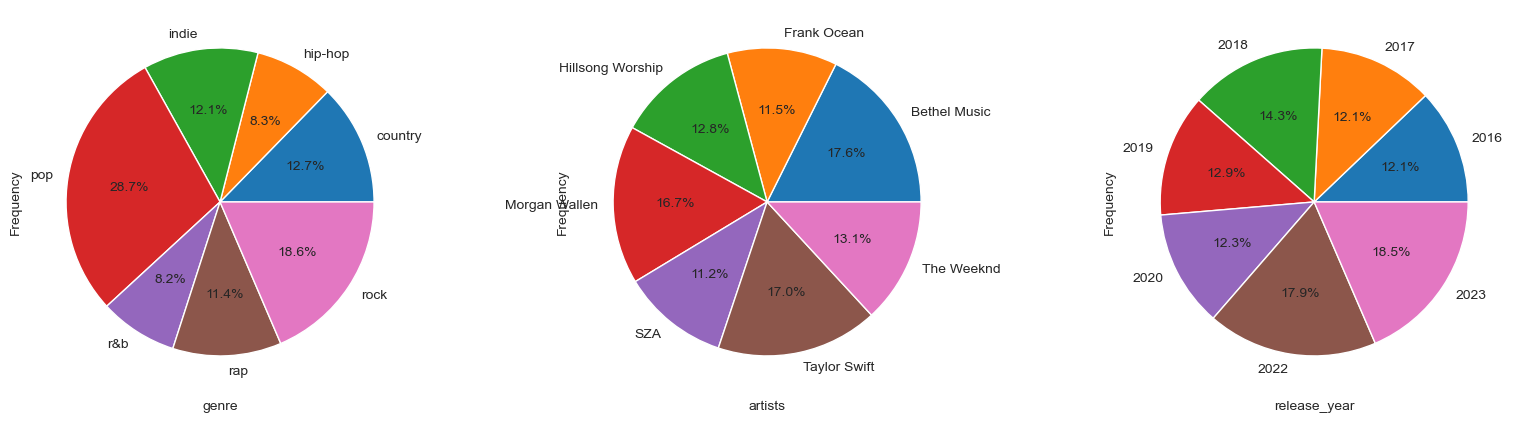

In [12]:
pie_cols = ['genre', 'artists', 'release_year']
plot_frequencies(repaired, pie_cols, 'pie', 7)

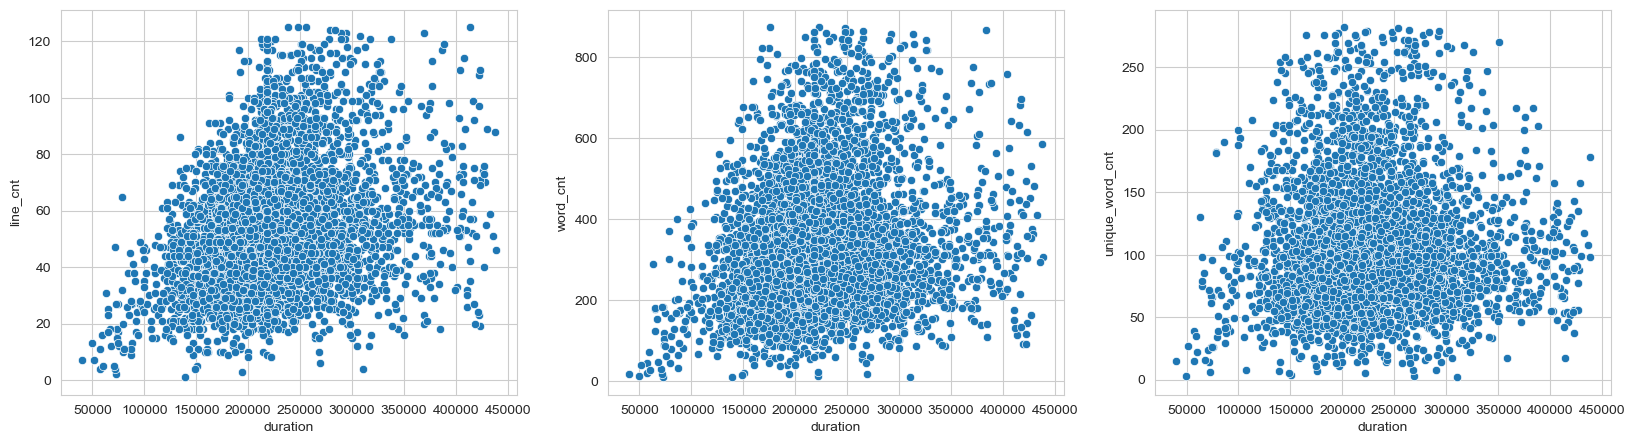

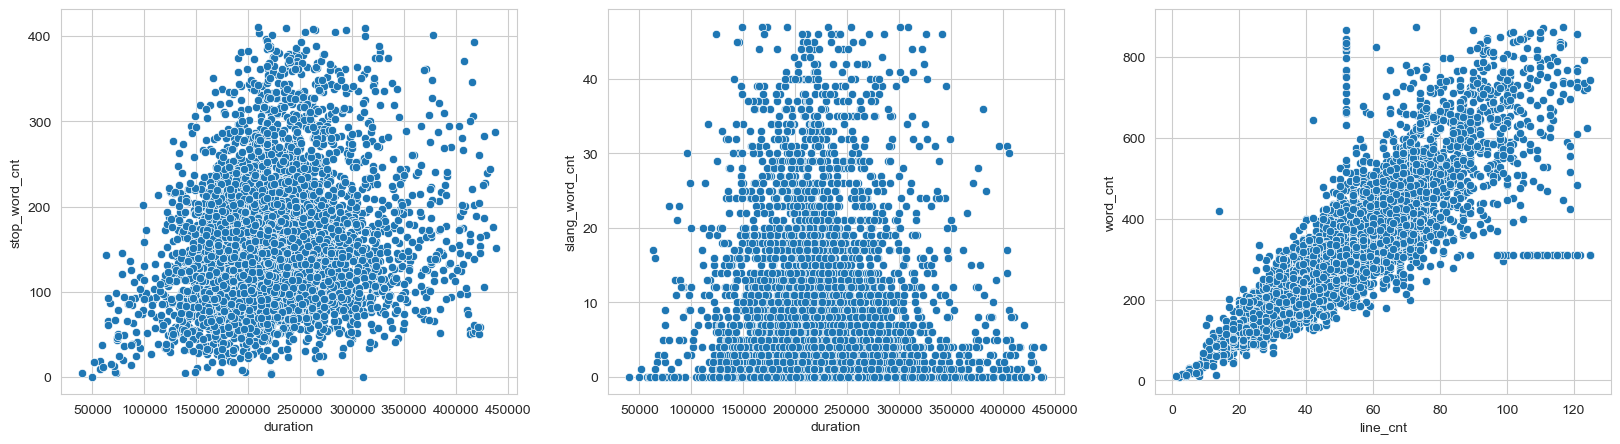

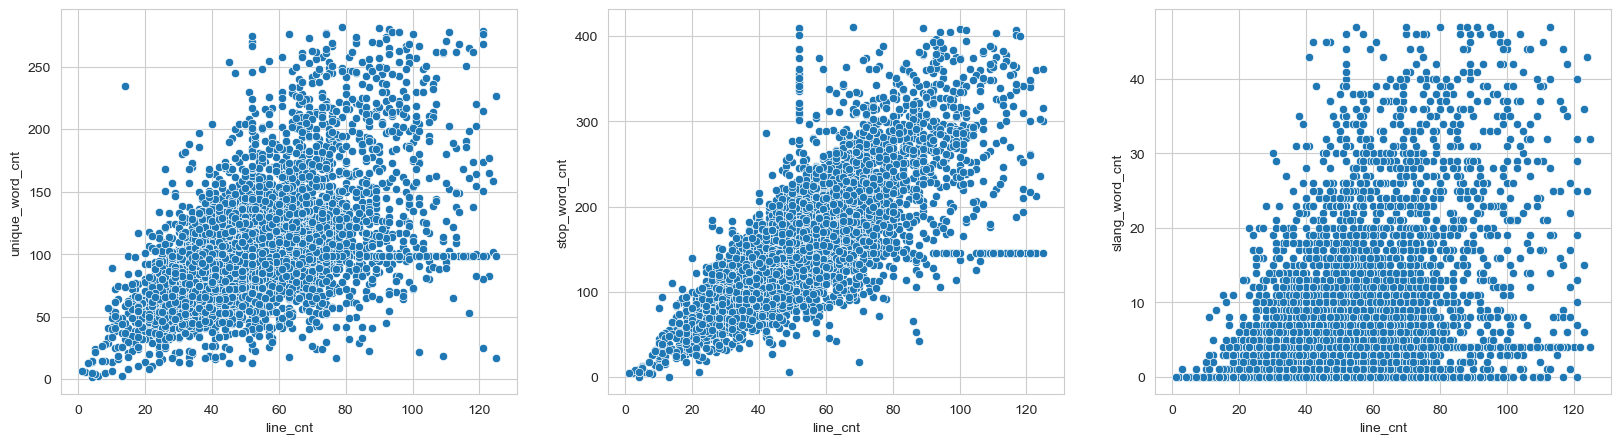

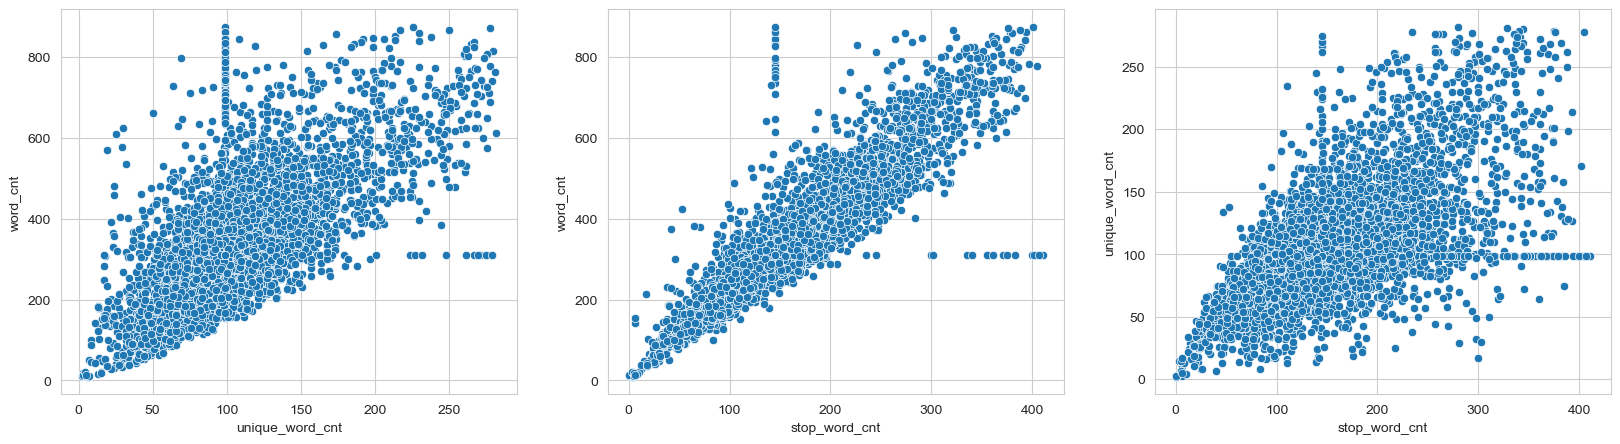

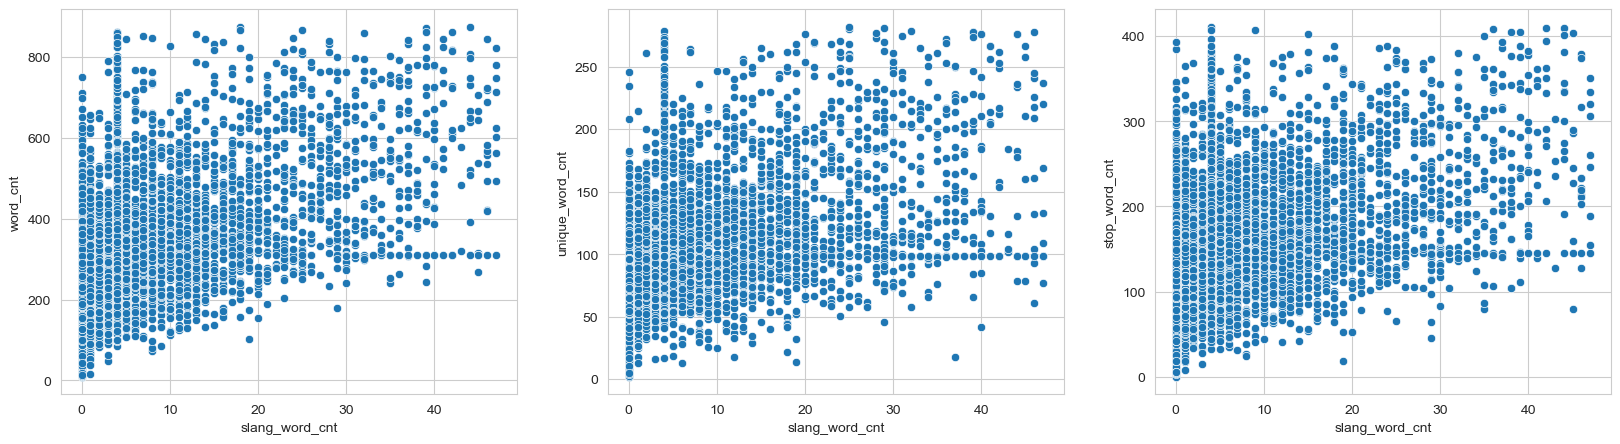

In [13]:
continuous_vars = ["duration", "line_cnt", "word_cnt", "unique_word_cnt", "stop_word_cnt", "slang_word_cnt"]
plot_continuous_feature_relations(repaired, continuous_vars)

## EDA

<Axes: >

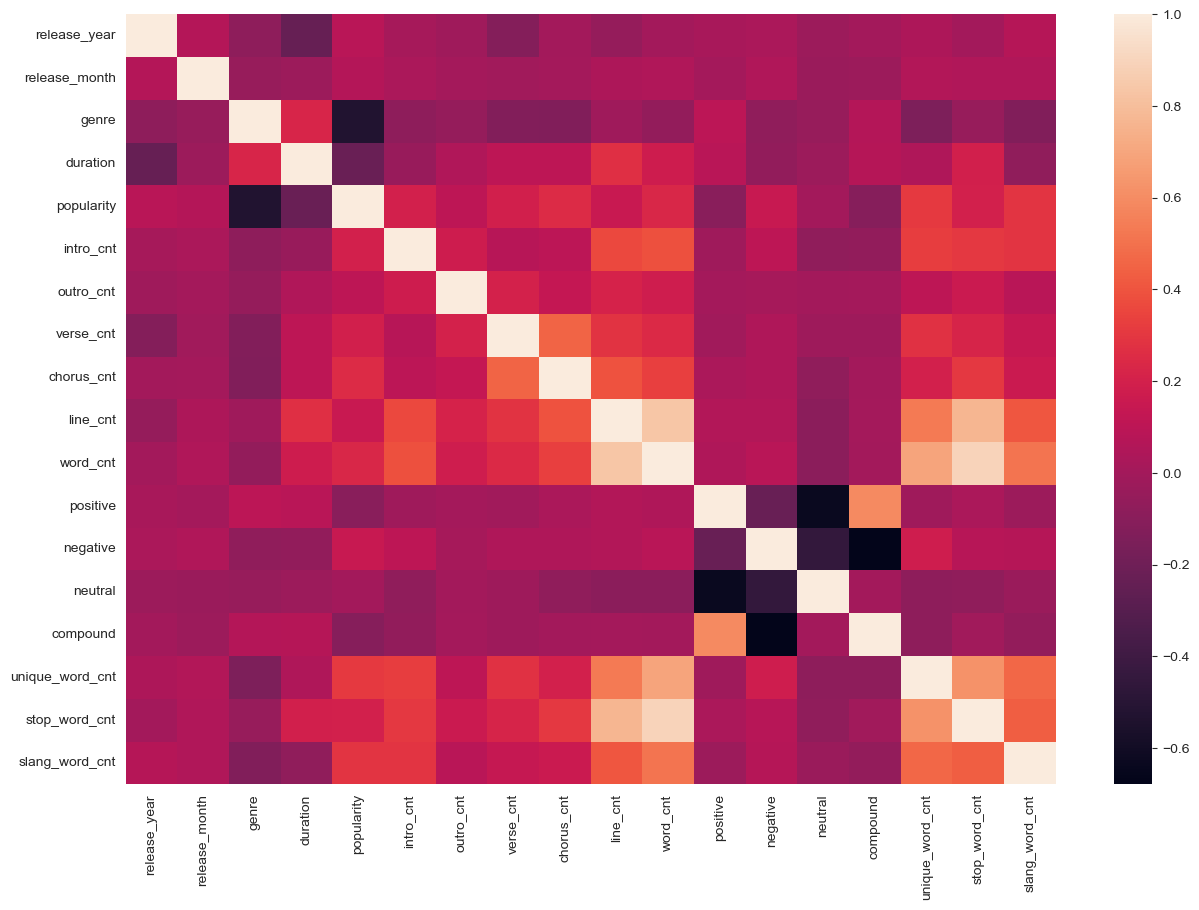

In [14]:
for_heat = repaired.copy()
for_heat.genre = pd.factorize(for_heat.genre)[0]
plt.figure(figsize=(15, 10))
sub_df = for_heat.select_dtypes('number')
sns.heatmap(sub_df.corr())

In [15]:
ratios = ["slang_word", "unique_word", "stop_word"]
repaired[[f"{field}_ratio" for field in ratios]] = repaired.apply(lambda x: x[[f"{field}_cnt" for field in ratios]]/x.word_cnt, axis=1)

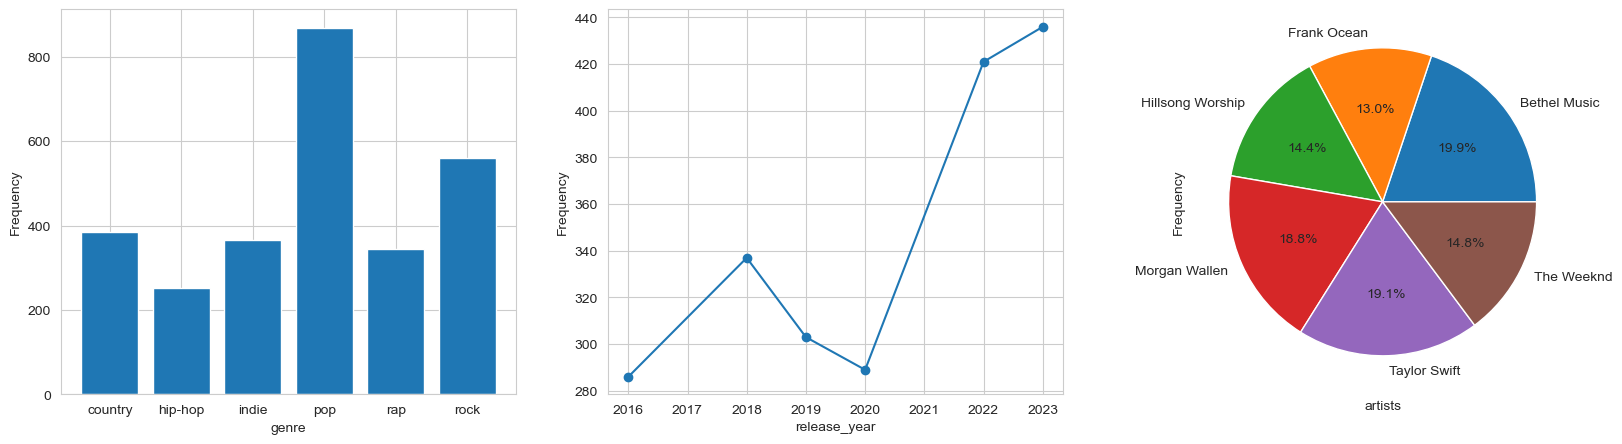

In [16]:
df_params = pd.DataFrame({'plot_type': ['bar', 'line', 'pie'],
                          'col_name': ['genre', 'release_year', 'artists'],
                          'num_top_elements': [6,6,6]})
plot_frequent_elements(repaired, df_params)

In [17]:
plt.rcParams["figure.figsize"] = (18,6)

In [18]:
cols_to_bin = ['release_year', 'duration', 'line_cnt', 'word_cnt', 'positive', 'negative', 'compound']
categorical_cols = ['chorus_cnt', 'verse_cnt', 'intro_cnt', 'outro_cnt']
transferred = transfer_to_categorical(repaired, cols_to_bin, categorical_cols)

## MACHINE LEARNING SECTION

In [19]:
transferred = transfer_str_to_numeric_vals(transferred)
transferred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5035 entries, 0 to 15397
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   source_genre              5035 non-null   int64   
 1   name                      5035 non-null   int64   
 2   artists                   5035 non-null   int64   
 3   release_year              5035 non-null   int64   
 4   release_month             5035 non-null   int64   
 5   genres                    5035 non-null   int64   
 6   genre                     5035 non-null   category
 7   duration                  5035 non-null   int64   
 8   popularity                5035 non-null   int64   
 9   lyrics_file               5035 non-null   int64   
 10  lyrics_url                5035 non-null   int64   
 11  line_cnt                  5035 non-null   int64   
 12  word_cnt                  5035 non-null   int64   
 13  positive                  5035 non-null   int64

In [20]:
# 'popularity', 'compound', 'neutral', 'line_cnt'
debug_cols = ['artists', 'genres', 'source_genre', 'name', 'lyrics_file', 'lyrics_url']
prepared = transferred.drop(columns=debug_cols, axis=1)

In [21]:
X_train, X_test, y_train, y_test = split_to_train_and_test(prepared, 'genre', 0.2, 5)
best_k, best_score = find_best_k_for_KNN(X_train, y_train)
print(best_k, best_score)

19 0.1916591402986915


In [22]:
params = {'n_neighbors':best_k}
knn_clf = get_classifier_obj("KNN",params)
knn_clf.fit(X_train, y_train)
y_predicted = knn_clf.predict(X_test)
accuracy_val = calc_evaluation_val("accuracy", y_test, y_predicted)
cm_val = calc_evaluation_val("confusion_matrix", y_test, y_predicted)
print(accuracy_val)
print(cm_val)

0.2025819265143992
[[ 0  2  0  0  0  0  0  0  2  1  9  0  1 15  0  0  2  0 11  0  2]
 [ 0  0  1  0  0  0  1  0  1  0  4  0  1  4  0  0  2  0  4  0  2]
 [ 1  1 27  0  0  0  1  0  0  1  3  0  1 22  1  0  2  0  7  0  1]
 [ 0  0  2  1  1  0  0  0  1  0  0  0  0  9  0  0  0  0  3  0  0]
 [ 0  0  1  0  1  0  0  0  0  0  2  0  0  4  0  0  0  0  1  0  2]
 [ 0  0  3  2  0  3  0  0  0  0  3  0  0  6  0  0  1  0  3  0  1]
 [ 0  1  7  0  0  0  2  0  1  0  4  0  0 13  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  1  1  0  2  0  0  0  0  6  0  1  6  0  2  0  0]
 [ 1  0  2  0  0  2  0  0  0  1  3  0  0 12  0  1  1  0  4  0 12]
 [ 2  0  8  0  1  0  0  0  1  4  3  0  1 16  0  1 10  0  9  0  0]
 [ 0  1 12  0  0  1  3  0  0  4 13  1  2 27  0  2  3  0  9  1  0]
 [ 0  1  0  1  0  0  2  0  0  0  2  0  0  4  0  0  0  0  4  0  0]
 [ 2  2  2  1  0  0  2  0  1  0  3  0  5 21  0  0  5  0  5  0  2]
 [ 4  4 24  3  0  1  1  0  1  2 13  0  2 89  0  4  7  0  9  0  4]
 [ 0  2  2  0  0  0  0  0  0  0  1  0  1 10  0  0  1  0  

In [23]:
max_dep = 5
min_smpl_split = 3
best_clf, best_recall_val=find_best_model(X_train, y_train, max_dep, min_smpl_split)
print(best_clf,best_recall_val)

DecisionTreeClassifier(max_depth=5, min_samples_split=3) -1


In [24]:
best_clf.fit(X_train, y_train)
y_predicted = best_clf.predict(X_test)
accuracy_val = calc_evaluation_val("accuracy", y_test, y_predicted)
print(accuracy_val)

0.24528301886792453
